# Main Analysis steps


- Verify that data is normally distributed
- Check if experimental treatment affects score: One-factor ANOVA
- Check if interactions present: two-factor ANOVA: score ~ profile, score ~ age
- Check if mediation: score ~ time_spent_avg, score ~ time_spent_total
- If there is interaction effect, do moderated mediation
- Final remarks

## Load data and libs

In [1]:
library(tidyverse) # Give ggplot, read_delim, tidyr, etc.
library(janitor) # Gives tabyl
library(gplots) # Gives plotmeans
library(ggstatsplot) # Gives pretty plotting
library(car) # Gives Anova

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Loading required package: carData


Attaching package: ‘car’


The following object is masked

In [2]:
library(tidyverse) # Give ggplot, read_delim, tidyr, etc.

df <- read_delim(file="dataset.csv", delim=",") %>%
  mutate(condition = factor(condition,labels=c("IPS","PSI")),
         age = factor(age),
         profile = factor(profile,
                           labels=c("practical","scholastic","operations")))

head(df)

Rows: 27 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): condition, profile
dbl (4): age, total_time_s, avg_time_s, score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


condition,age,profile,total_time_s,avg_time_s,score
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
IPS,15,scholastic,1193,11,3.0
PSI,16,scholastic,1286,3,1.0
IPS,15,scholastic,1524,8,0.5
PSI,17,scholastic,931,11,2.0
IPS,15,scholastic,1083,6,2.0
IPS,15,scholastic,1010,14,5.0


## Descriptives

In [3]:
summary(df)

 condition age           profile    total_time_s      avg_time_s    
 IPS:14    15: 7   practical : 6   Min.   : 552.0   Min.   : 3.000  
 PSI:13    16:14   scholastic:10   1st Qu.: 869.5   1st Qu.: 6.000  
           17: 6   operations:11   Median :1022.0   Median : 8.000  
                                   Mean   :1155.4   Mean   : 9.407  
                                   3rd Qu.:1340.5   3rd Qu.:11.000  
                                   Max.   :2568.0   Max.   :24.000  
     score      
 Min.   :0.000  
 1st Qu.:1.000  
 Median :2.000  
 Mean   :2.019  
 3rd Qu.:3.000  
 Max.   :6.000  

## Dependent variable: score

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


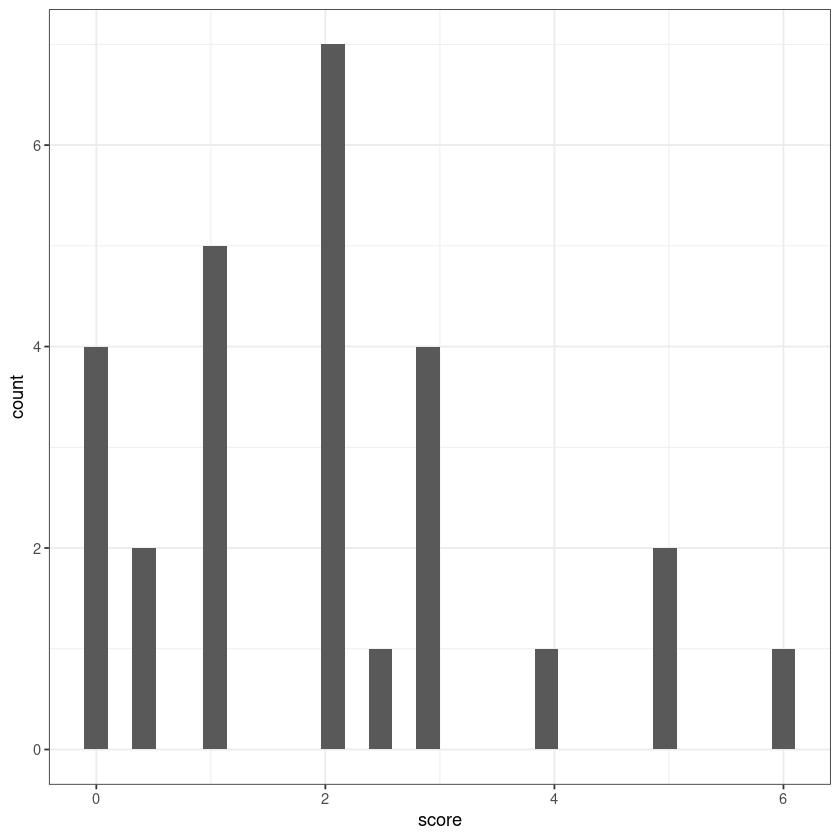

In [4]:
df %>% 
  ggplot(aes(x=score)) +
  geom_histogram() + 
  theme_bw() 

## Indermediate variables

# Avg time spent

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


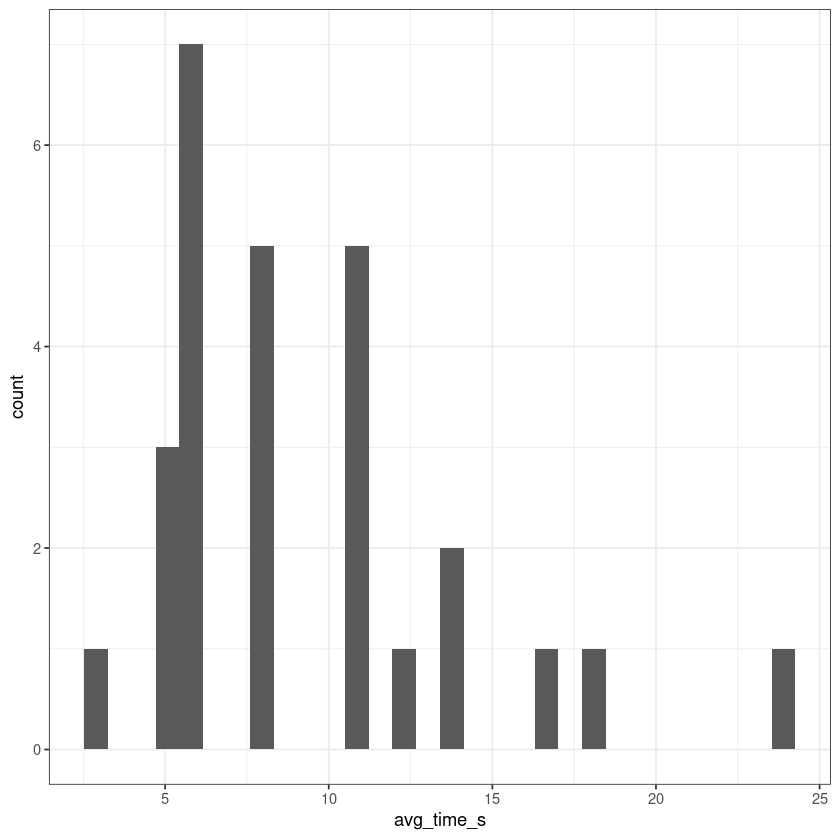

In [5]:
df %>% 
  ggplot(aes(x=avg_time_s)) +
  geom_histogram() + 
  theme_bw() 


## Total time spent

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


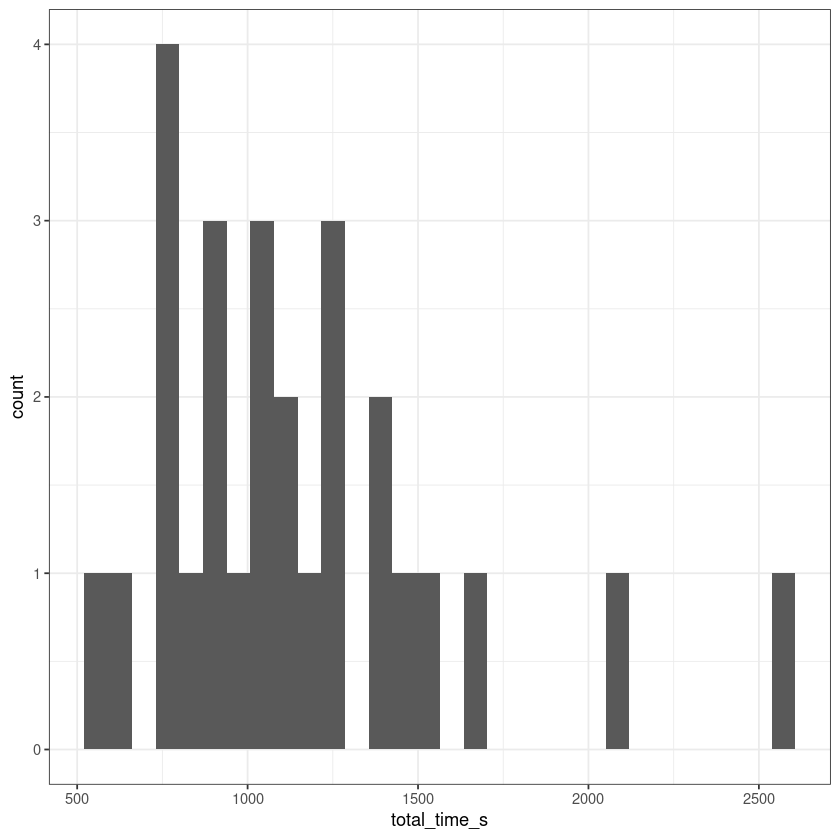

In [6]:
df %>% 
  ggplot(aes(x=total_time_s)) +
  geom_histogram() + 
  theme_bw() 


## Control variables

## Profile and Condition

In [7]:
table(df$condition, df$profile)

     
      practical scholastic operations
  IPS         3          5          6
  PSI         3          5          5

## Age and Condition

In [8]:
table(df$condition, df$age)

     
      15 16 17
  IPS  5  6  3
  PSI  2  8  3


## Question 1: Does the experimental treatment affect learning ? 

In other terms, does the manipulation of the IV affect the DV ? library(gplots) # Gives plotmeans
plotmeans(learning ~ condition, 
          main="Average learning gain given condition",
          ylab="Average learning gain",
          xlab = "Condition",
          data=df)

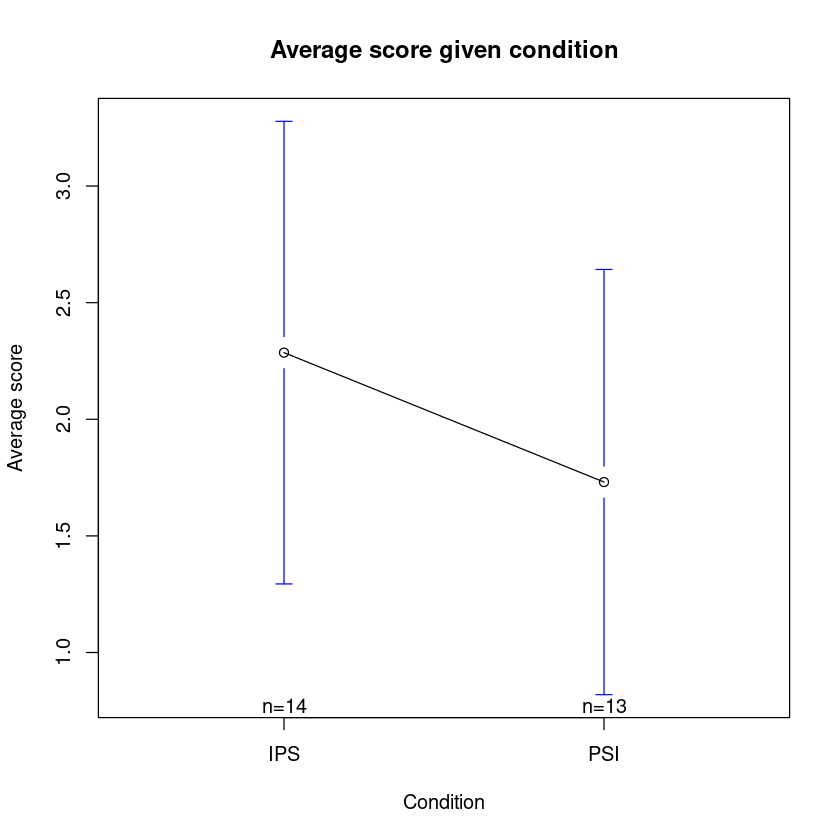

In [9]:
library(gplots) # Gives plotmeans
plotmeans(score ~ condition, 
          main="Average score given condition",
          ylab="Average score",
          xlab = "Condition",
          data=df)

## Conclusion: 
They overlap a lot, no statistically significant difference

Below more sophisticated representation

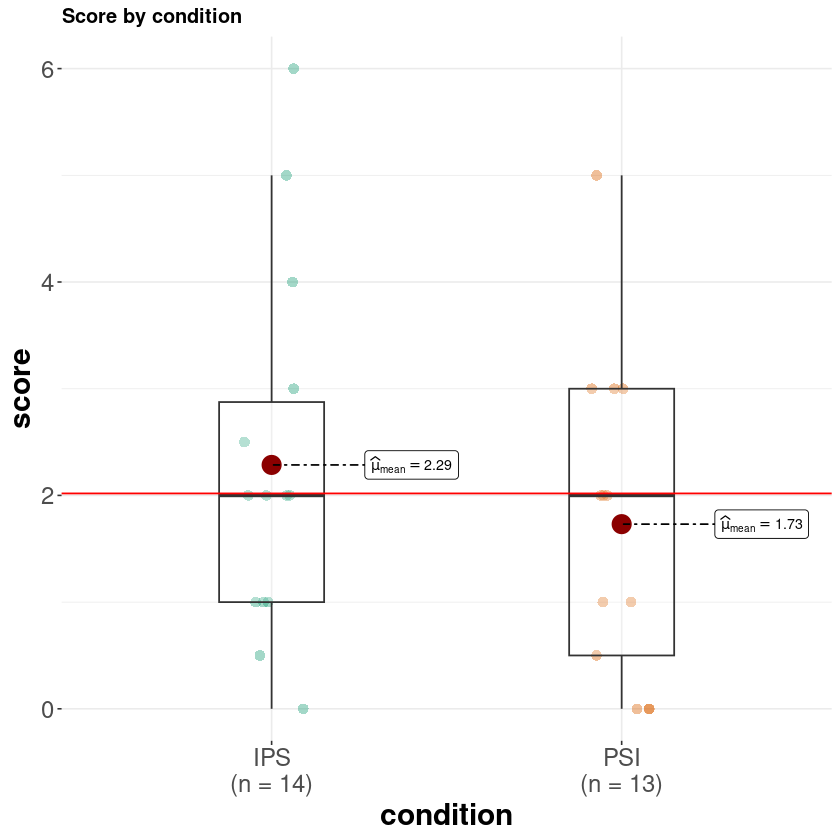

In [10]:
library(ggstatsplot) 
Y_bar <- mean(df$score)
ggbetweenstats(data = df, 
                            x = condition, 
                            y = score,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Score by condition", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) +
  geom_hline(aes(yintercept=Y_bar), color="red" )
  


## One-Factor ANOVA

In [11]:
model.0 <- lm(score ~ condition, 
              contrasts=list(condition=contr.sum),
              data=df)
summary(model.0)


Call:
lm(formula = score ~ condition, data = df, contrasts = list(condition = contr.sum))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2857 -1.2857 -0.2857  0.9918  3.7143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0082     0.3121   6.434 9.75e-07 ***
condition1    0.2775     0.3121   0.889    0.382    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.621 on 25 degrees of freedom
Multiple R-squared:  0.03064,	Adjusted R-squared:  -0.008129 
F-statistic: 0.7903 on 1 and 25 DF,  p-value: 0.3825


## Conclusion:

$p = 0.382 > 0.05$: **we cannot reject the null hypothesis**

In [12]:
library(car) # load library car first.
Anova(model.0, type="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
condition,2.075906,1,0.7903414,0.3824716
Residuals,65.664835,25,NA,NA


### Checking Normality Assumptions

In [13]:
shapiro.test(model.0$residuals)


	Shapiro-Wilk normality test

data:  model.0$residuals
W = 0.93267, p-value = 0.08039


## Conclusion

p-value is larger than 0.05, can't reject null hypothesis, according to test residuals are normally distributed.

In [14]:
x <- model.0$residuals
ks.test(x, "pnorm", mean(x, na.rm = T), sd(x, na.rm = T))

Warning message in ks.test.default(x, "pnorm", mean(x, na.rm = T), sd(x, na.rm = T)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x
D = 0.13644, p-value = 0.6963
alternative hypothesis: two-sided


Same here

In [15]:
bartlett.test(residuals(model.0) ~ df$condition)



	Bartlett test of homogeneity of variances

data:  residuals(model.0) by df$condition
Bartlett's K-squared = 0.2011, df = 1, p-value = 0.6538


In our case, the p-value is much larger than .05 which does not allow us to reject the null hypothesis H0 . Hence we conclude that the variances are equal in both groups.

# Checking for moderation

## Two-factor anova

## condition ~ profile

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


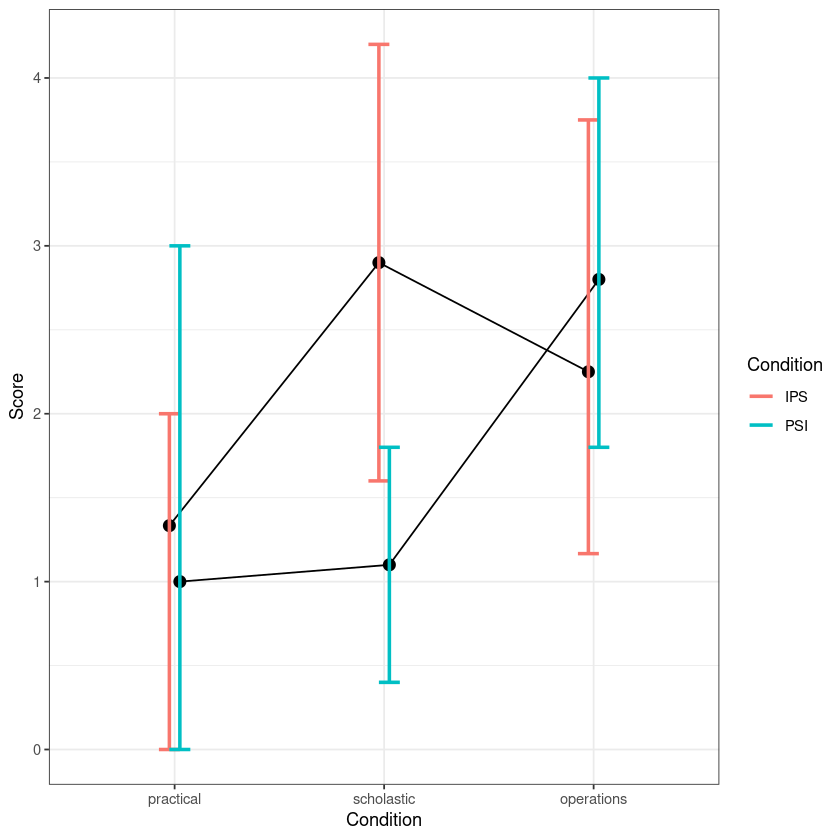

In [16]:
pd = position_dodge(width = 0.1)

gp <- df %>% ggplot(aes(x = profile, y = score, group = condition)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = condition)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Score") + 
  scale_colour_discrete(name = "Condition")

gp
ggsave(gp, file="condition-profile-interaction.png", width=6, height=4)


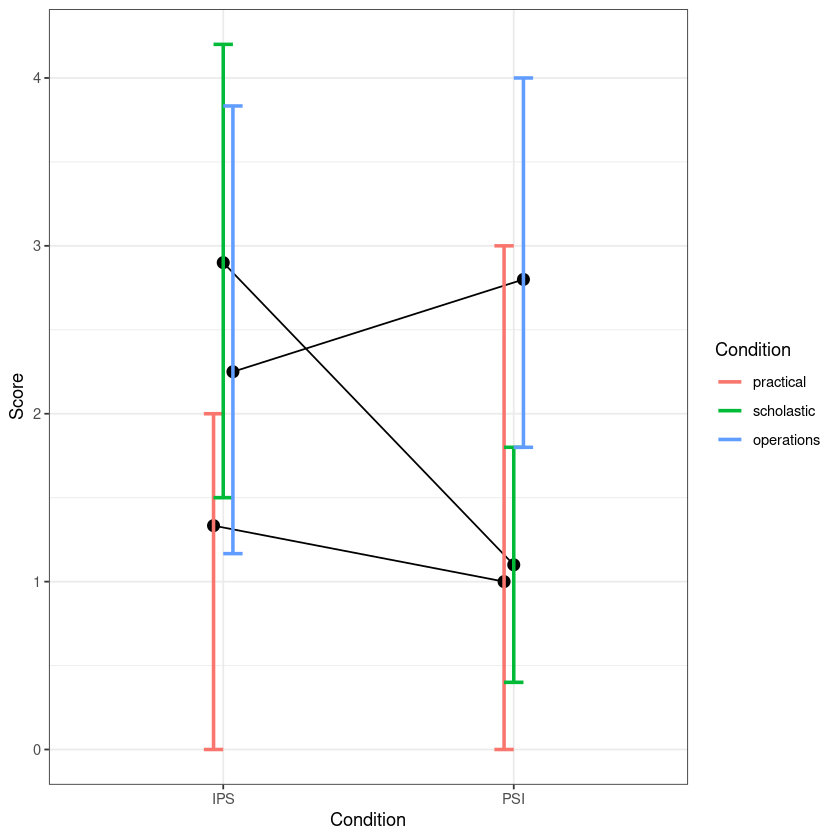

In [17]:
gp <- df %>% ggplot(aes(x = condition, y = score, group = profile)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = profile)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Score") + 
  scale_colour_discrete(name = "Condition")


gp
ggsave(gp, file="score-condition-interaction.png", width=6, height=4)


In [18]:
model.2 <- lm(score ~ 
                condition + 
                profile +
                condition:profile,
              contrasts=list(condition=contr.sum, profile=contr.sum),
              data=df)
summary(model.2)


Call:
lm(formula = score ~ condition + profile + condition:profile, 
    data = df, contrasts = list(condition = contr.sum, profile = contr.sum))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4000 -1.0500 -0.1000  0.7833  3.7500 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.89722    0.31321   6.057 5.19e-06 ***
condition1           0.26389    0.31321   0.843    0.409    
profile1            -0.73056    0.48475  -1.507    0.147    
profile2             0.10278    0.42453   0.242    0.811    
condition1:profile1 -0.09722    0.48475  -0.201    0.843    
condition1:profile2  0.63611    0.42453   1.498    0.149    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.57 on 21 degrees of freedom
Multiple R-squared:  0.2362,	Adjusted R-squared:  0.05432 
F-statistic: 1.299 on 5 and 21 DF,  p-value: 0.3021


In [19]:
Anova(model.2, type="III")


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),90.404845,1,36.691933,5.191280e-06
condition,1.749031,1,0.709866,4.089820e-01
profile,7.153829,2,1.451735,2.567217e-01
condition:profile,7.270721,2,1.475456,2.514322e-01
Residuals,51.741667,21,NA,NA


# Reporting the ANOVA with interaction

A two way ANOVA was conducted with the experimental condition, and the control variable age group. We tested for interactions between the condition and the control variables. There was an interaction effect between condition and profile
(F[2,21]=1.4755, p =.2567). Inspection of the graphical patterns of the means indicates that the PSI condition worked especially well for students in the operations profile in comparison with students in the practical or scholastic profile.


## condition ~ age

In [20]:
model.with.interaction <- lm(score ~ condition + age + condition:age, 
              contrasts=list(condition=contr.sum, gender=contr.sum),
              data=df)

Anova(model.with.interaction, type="III")

Warning message in model.matrix.default(mt, mf, contrasts):
“variable 'gender' is absent, its contrast will be ignored”


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),35.714286,1,12.3435625,0.002066283
condition,0.000000,1,0.0000000,1.000000000
age,2.972596,2,0.5136939,0.605607334
condition:age,2.323853,2,0.4015847,0.674289614
Residuals,60.760417,21,NA,NA


## Conclusion:

No significant interaction, use type "II" now. (should do same above for profile I suppose)

In [21]:
model.without.interaction <- lm(score ~ condition + age, 
              contrasts=list(condition=contr.sum, age=contr.sum),
              data=df)

Anova(model.without.interaction, type="II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
condition,1.415730,1,0.5161635,0.4797183
age,2.580566,2,0.4704264,0.6306154
Residuals,63.084270,23,NA,NA


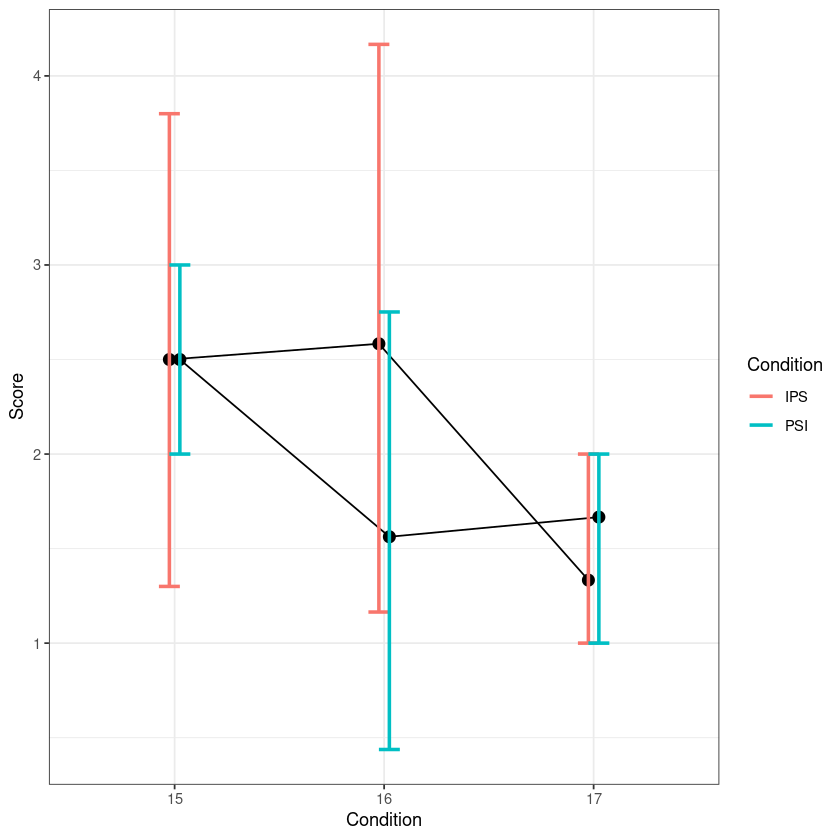

In [22]:
gp <- df %>% ggplot(aes(x = age, y = score, group = condition)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = condition)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Score") + 
  scale_colour_discrete(name = "Condition")


gp
ggsave(gp, file="condition-gender-interaction.png", width=6, height=4)


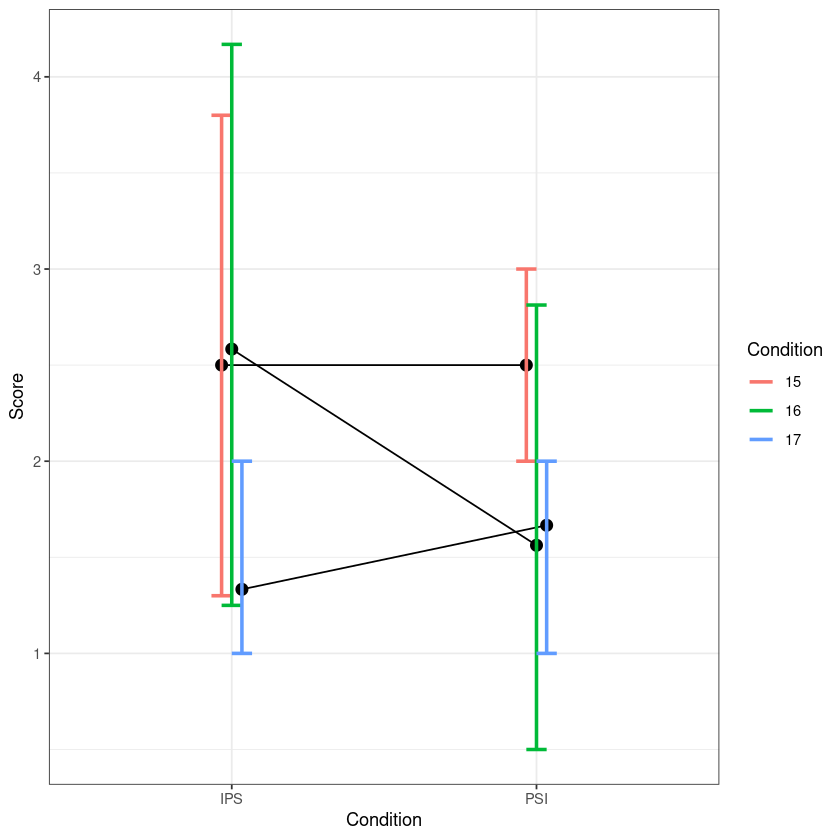

In [23]:
gp <- df %>% ggplot(aes(x = condition, y = score, group = age)) +
 geom_line(stat = "summary", fun = "mean", position = pd) +
 geom_point(stat = "summary", fun = "mean", position = pd, size = 3) +
 stat_summary(fun.data = "mean_cl_boot", size = 1, position = pd, geom = "errorbar",
    width = 0.2, aes(colour = age)) +
   theme_bw() +
  xlab("Condition") +
  ylab("Score") + 
  scale_colour_discrete(name = "Condition")


gp
ggsave(gp, file="score-condition-interaction.png", width=6, height=4)


In [24]:
## let's just say this is no interaction

tapply(df$score, df$condition, mean)
tapply(df$score, df$condition, sd)

IPS      PSI 
2.285714 1.730769

IPS      PSI 
1.717716 1.508523

A two way ANOVA was conducted with the experimental condition, and the control variable gender. There was no interaction effect between condition and gender. There is no main effect of the experimental condition (F[1,23]=0.5162, p=0.4797). The subjects in the IPS group had a higher score (M=2.29, sd=1.72) than the subjects in the PSI group (M=1.73, sd=1.50). There was no main effect of age (F[1,23]=0.47, p > .05).


## Mediation Checks

## AVG TIME

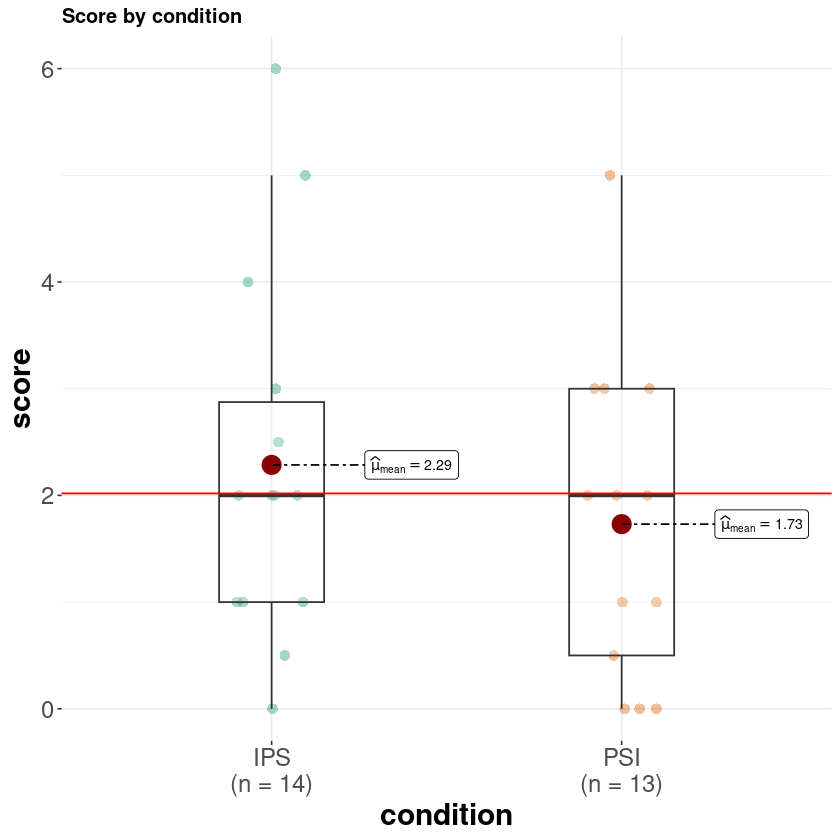

In [25]:
library(ggstatsplot) 
Y_bar <- mean(df$score)
ggbetweenstats(data = df, 
                            x = condition, 
                            y = score,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Score by condition", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) +
  geom_hline(aes(yintercept=Y_bar), color="red" )
  


Like before: condition doese not significantly affect score

Does the condition affect the average time spent on exercises?

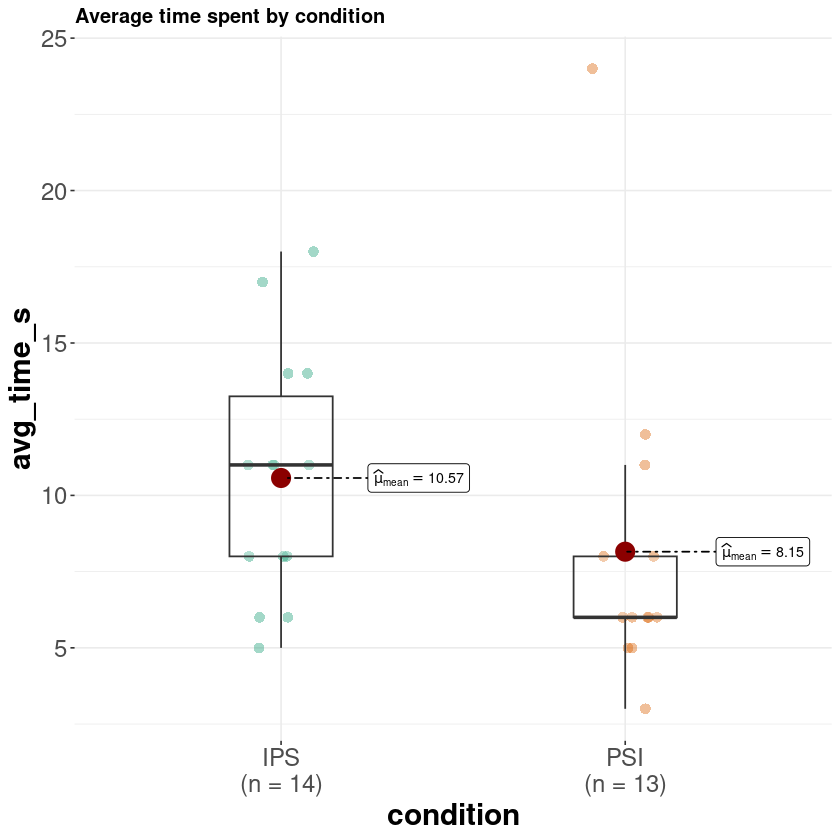

In [26]:
ggbetweenstats(data = df, 
                            x = condition, 
                            y = avg_time_s,
                            pairwise.comparisons = FALSE, 
                            results.subtitle=FALSE,
                            var.equal = TRUE,
                            outlier.tagging = FALSE, 
                            plot.type = "box", 
                            title = "Average time spent by condition", 
                            ggplot.component = list(theme(text = element_text(size = 18)))) 


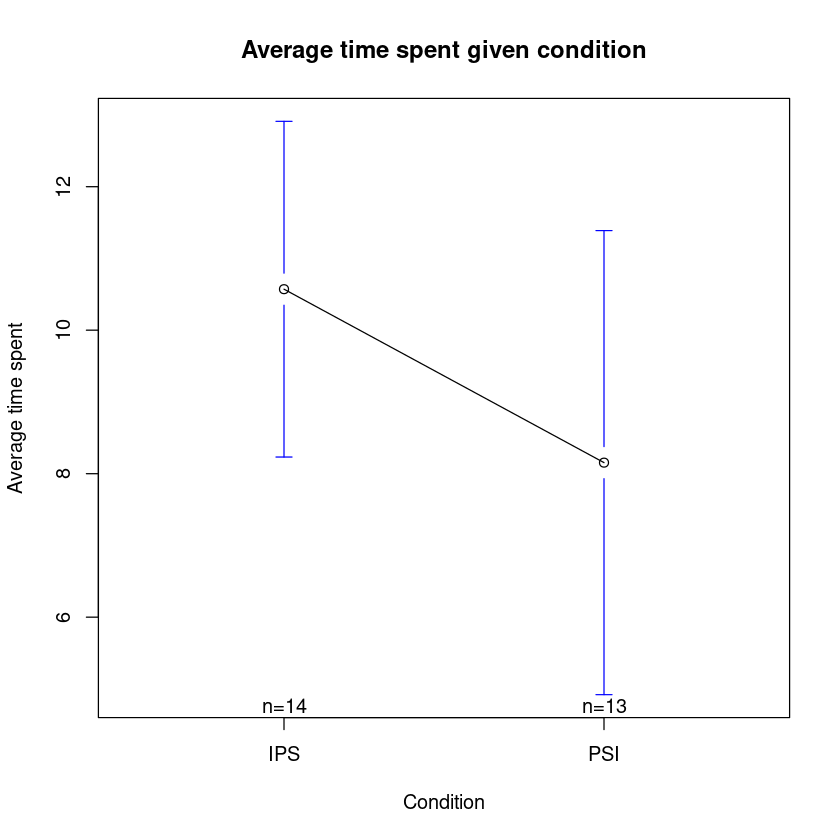

In [27]:
library(gplots) # Gives plotmeans
plotmeans(avg_time_s ~ condition, 
          main="Average time spent given condition",
          ylab="Average time spent",
          xlab = "Condition",
          data=df)


Conclusion: yes! IPS increases the average time spent on slides, but not significantly

[1] -0.1278671

`geom_smooth()` using formula = 'y ~ x'


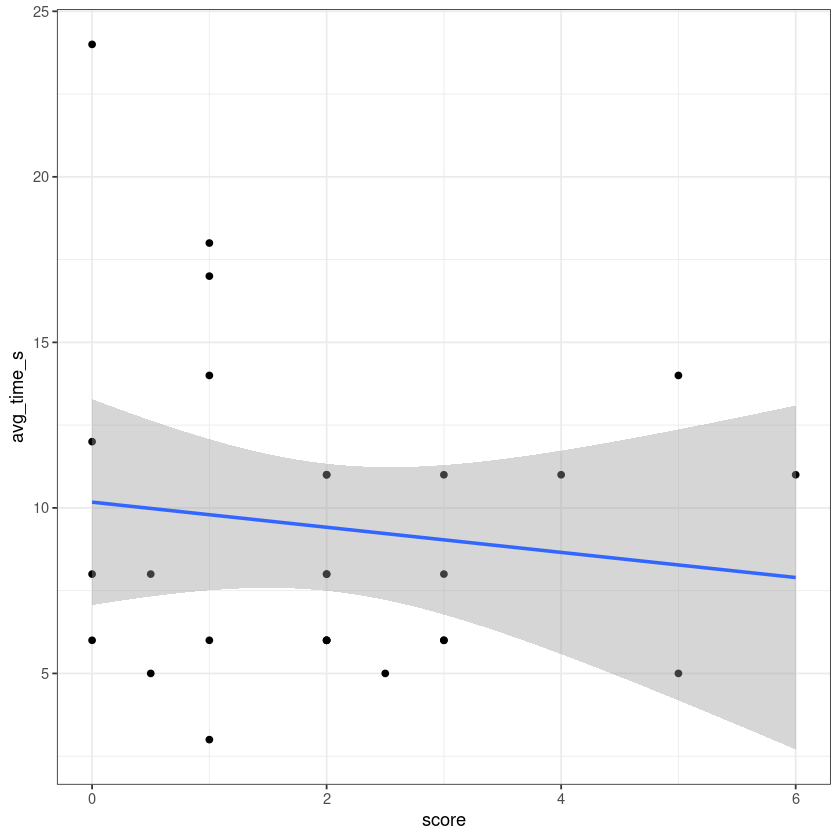

In [28]:
cor(df$score, df$avg_time_s)

df %>% ggplot(aes(x=score, y=avg_time_s)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_bw() 

No statistical relevance: they are not correlated

# TODO: maybe do the whole rest of the analysis, but I do not think it is necessary


In [29]:
c.path <- lm(score ~ condition, data=df)
summary(c.path)


Call:
lm(formula = score ~ condition, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2857 -1.2857 -0.2857  0.9918  3.7143 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.2857     0.4331   5.277 1.82e-05 ***
conditionPSI  -0.5549     0.6242  -0.889    0.382    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.621 on 25 degrees of freedom
Multiple R-squared:  0.03064,	Adjusted R-squared:  -0.008129 
F-statistic: 0.7903 on 1 and 25 DF,  p-value: 0.3825


In [30]:
a.path <- lm(avg_time_s ~ condition, data=df)
summary(a.path)


Call:
lm(formula = avg_time_s ~ condition, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.571 -2.571 -2.154  1.637 15.846 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    10.571      1.262   8.379    1e-08 ***
conditionPSI   -2.418      1.818  -1.330    0.196    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.721 on 25 degrees of freedom
Multiple R-squared:  0.06605,	Adjusted R-squared:  0.02869 
F-statistic: 1.768 on 1 and 25 DF,  p-value: 0.1956


In [31]:
c.dash.path <- lm(score  ~ condition + avg_time_s, data=df)
summary(c.dash.path)



Call:
lm(formula = score ~ condition + avg_time_s, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4461 -0.9685 -0.4461  0.9380  3.7410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.94505    0.84835   3.471  0.00198 **
conditionPSI -0.70573    0.64827  -1.089  0.28713   
avg_time_s   -0.06237    0.06891  -0.905  0.37444   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.627 on 24 degrees of freedom
Multiple R-squared:  0.06264,	Adjusted R-squared:  -0.01548 
F-statistic: 0.8019 on 2 and 24 DF,  p-value: 0.4601


In [32]:
# a path
coef(summary(a.path))
# a is the unstandardised coefficient for the path from X to M
a = 6.819128
Sa = 0.7634712

# c_dash path
coef(summary(c.dash.path))
# b refers to the unstadardised coefficient for the path from M to Y 
b=0.1032689
Sb=0.01256431

a*b
z <- (a*b) / sqrt(b^2 * Sa^2 + b^2 * Sa^2)
z


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.571429,1.261655,8.379015,1.000107e-08
conditionPSI,-2.417582,1.818239,-1.329629,1.956462e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.94504714,0.84835134,3.4714947,0.001976841
conditionPSI,-0.70572804,0.64827119,-1.0886309,0.287128085
avg_time_s,-0.06236932,0.06891259,-0.9050498,0.374435309


[1] 0.7042038

[1] 6.315696

In [33]:
# The critical value (1.96 for a two tailed test with alpha = 0.05)
critical.value <- qnorm(0.025, mean = 0, sd = 1, lower.tail = FALSE)
critical.value


[1] 1.959964

In [34]:
p.value <- pnorm(q = z, mean = 0, sd = 1, lower.tail = FALSE)
p.value


[1] 1.344745e-10

In [35]:
library(mediation) # Gives mediate()

results <- mediate(a.path, c.dash.path, 
                   treat='condition', 
                   mediator='avg_time_s',
                   boot=TRUE, sims=100,
                   control.value = "IPS", 
                   treat.value = "PSI")


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0


Running nonparametric bootstrap




In [36]:
summary(results)



Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

               Estimate 95% CI Lower 95% CI Upper p-value
ACME              0.151       -0.522         0.52    0.40
ADE              -0.706       -1.807         0.51    0.34
Total Effect     -0.555       -1.744         0.55    0.32
Prop. Mediated   -0.272       -2.475         2.02    0.60

Sample Size Used: 27 


Simulations: 100 


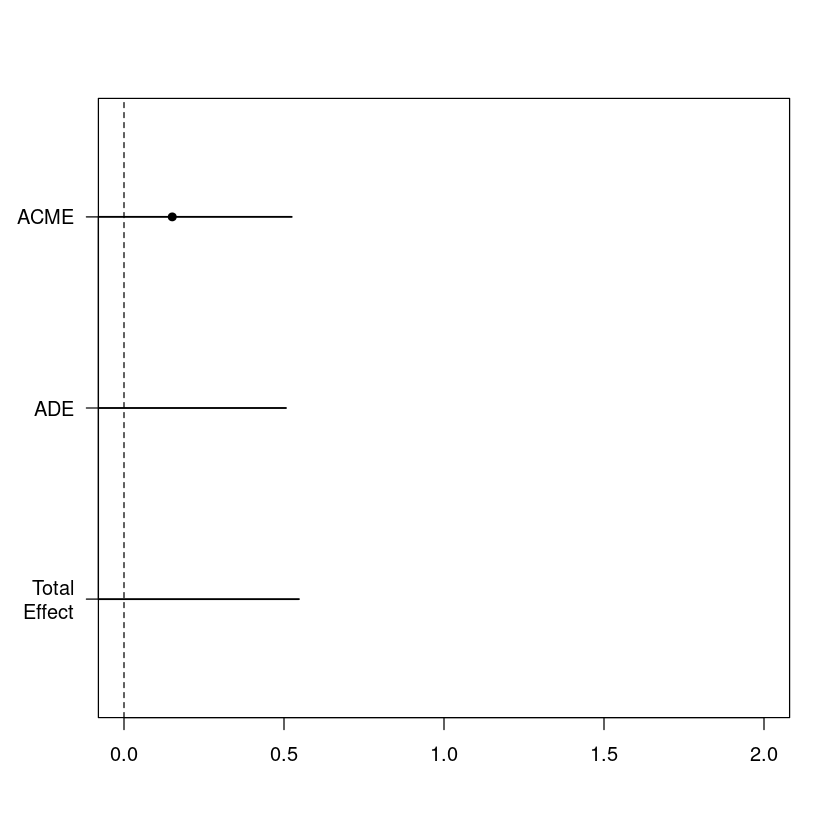

In [37]:
plot(results, xlim=c(0,2))
